In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import axes_dict, plot_some, plot_history
from csbdeep.utils.tf import limit_gpu_memory
from csbdeep.io import load_training_data
from csbdeep.models import Config, ProjectionCARE

Using TensorFlow backend.


In [2]:
limit_gpu_memory(fraction=1/2)

In [3]:
(X,Y), (X_val,Y_val), axes = load_training_data('/home/s353960/programs/CSBDeep/Model_Bilder_Christoph_alle/my_training_data.npz', validation_split=0.1, verbose=True)

c = axes_dict(axes)['C']
n_channel_in, n_channel_out = X.shape[c], Y.shape[c]


number of training images:	 850
number of validation images:	 94
image size (3D):		 (2, 128, 128)
axes:				 SZYXC
channels in / out:		 1 / 1


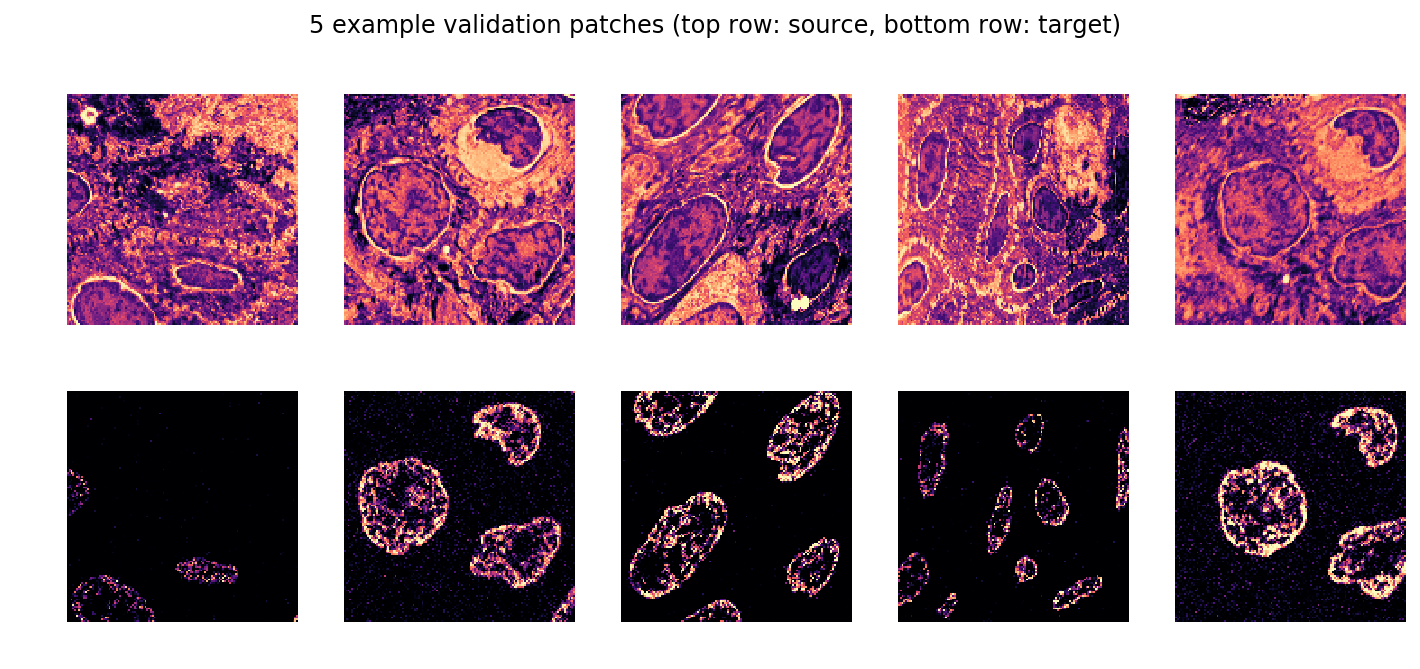

In [4]:
plt.figure(figsize=(12,5))
plot_some(X_val[:5],Y_val[:5])
plt.suptitle('5 example validation patches (top row: source, bottom row: target)');


In [5]:
config = Config(axes, n_channel_in, n_channel_out, unet_n_depth=3, train_batch_size=8, train_steps_per_epoch=800, train_epochs=200)
print(config)
vars(config)


Config(axes='ZYXC', n_channel_in=1, n_channel_out=1, n_dim=3, probabilistic=False, train_batch_size=8, train_checkpoint='weights_best.h5', train_epochs=200, train_learning_rate=0.0004, train_loss='mae', train_reduce_lr={'factor': 0.5, 'patience': 10, 'min_delta': 0}, train_steps_per_epoch=800, train_tensorboard=True, unet_input_shape=(None, None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=3, unet_n_first=32, unet_residual=True)


{'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'probabilistic': False,
 'unet_residual': True,
 'unet_n_depth': 3,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'mae',
 'train_epochs': 200,
 'train_steps_per_epoch': 800,
 'train_learning_rate': 0.0004,
 'train_batch_size': 8,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10, 'min_delta': 0}}

In [6]:
model = ProjectionCARE(config, 'my_model', basedir='/home/s353960/programs/CSBDeep/Model_Bilder_Christoph_alle/')

In [7]:


model.proj_params



ProjectionParameters(axis='Z', n_depth=4, n_filt=8, n_conv_per_depth=1, kern=(3, 3, 3), pool=(1, 2, 2))

In [8]:

history = model.train(X,Y, validation_data=(X_val,Y_val))



Epoch 1/200
800/800 [==============================] - 38s 47ms/step - loss: 0.0697 - mse: 0.0370 - mae: 0.0697 - val_loss: 0.0600 - val_mse: 0.0349 - val_mae: 0.0600
Epoch 2/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0577 - mse: 0.0314 - mae: 0.0577 - val_loss: 0.0519 - val_mse: 0.0236 - val_mae: 0.0519
Epoch 3/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0492 - mse: 0.0211 - mae: 0.0492 - val_loss: 0.0494 - val_mse: 0.0193 - val_mae: 0.0494
Epoch 4/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0445 - mse: 0.0178 - mae: 0.0445 - val_loss: 0.0446 - val_mse: 0.0175 - val_mae: 0.0446
Epoch 5/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0411 - mse: 0.0154 - mae: 0.0411 - val_loss: 0.0425 - val_mse: 0.0165 - val_mae: 0.0425
Epoch 6/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0390 - mse: 0.0142 - mae: 0.0390 - val_loss: 0.0410 - val_mse: 0.0158 - val_mae: 0.041

800/800 [==============================] - 35s 44ms/step - loss: 0.0215 - mse: 0.0072 - mae: 0.0215 - val_loss: 0.0412 - val_mse: 0.0177 - val_mae: 0.0412
Epoch 49/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0216 - mse: 0.0072 - mae: 0.0216 - val_loss: 0.0409 - val_mse: 0.0178 - val_mae: 0.0409
Epoch 50/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0214 - mse: 0.0072 - mae: 0.0214 - val_loss: 0.0409 - val_mse: 0.0178 - val_mae: 0.0409
Epoch 51/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0214 - mse: 0.0071 - mae: 0.0214 - val_loss: 0.0415 - val_mse: 0.0178 - val_mae: 0.0415
Epoch 52/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0214 - mse: 0.0072 - mae: 0.0214 - val_loss: 0.0415 - val_mse: 0.0178 - val_mae: 0.0415
Epoch 53/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0213 - mse: 0.0071 - mae: 0.0213 - val_loss: 0.0411 - val_mse: 0.0178 - val_mae: 0.0411

Epoc

800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch 95/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch 96/200
800/800 [==============================] - 35s 43ms/step - loss: 0.0203 - mse: 0.0070 - mae: 0.0203 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch 97/200
800/800 [==============================] - 35s 43ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch 98/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch 99/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0182 - val_mae: 0.0413
Epoch

Epoch 141/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 142/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0203 - mse: 0.0070 - mae: 0.0203 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 143/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413

Epoch 00143: ReduceLROnPlateau reducing learning rate to 4.882812376649781e-08.
Epoch 144/200
800/800 [==============================] - 35s 43ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 145/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 146/200
800/800 [==============================] - 35s 43ms/step - l

800/800 [==============================] - 35s 44ms/step - loss: 0.0202 - mse: 0.0070 - mae: 0.0202 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 188/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 189/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 190/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0203 - mse: 0.0070 - mae: 0.0203 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 191/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413
Epoch 192/200
800/800 [==============================] - 35s 44ms/step - loss: 0.0201 - mse: 0.0070 - mae: 0.0201 - val_loss: 0.0413 - val_mse: 0.0183 - val_mae: 0.0413


['loss', 'lr', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']


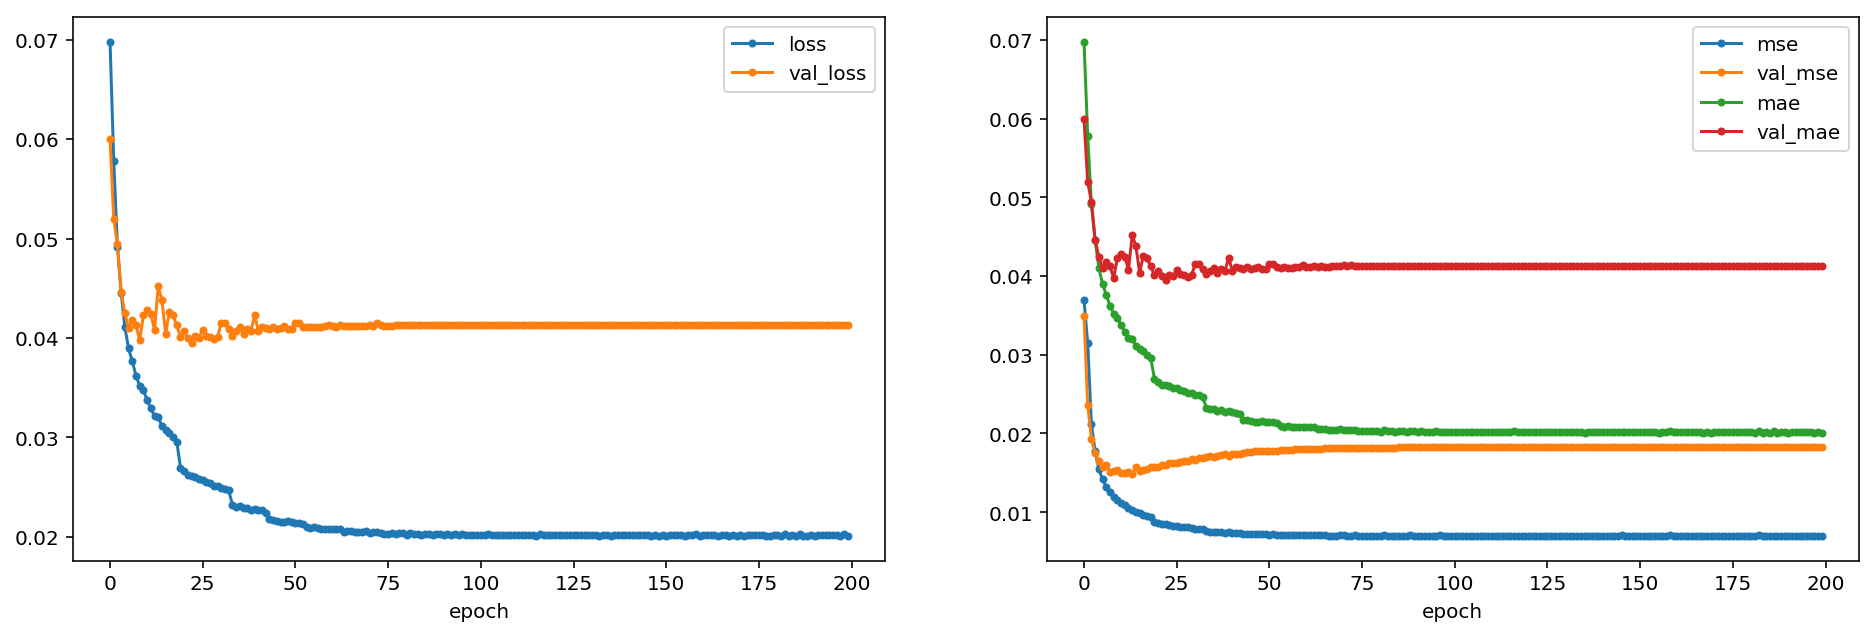

In [9]:


print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss'],['mse','val_mse','mae','val_mae']);



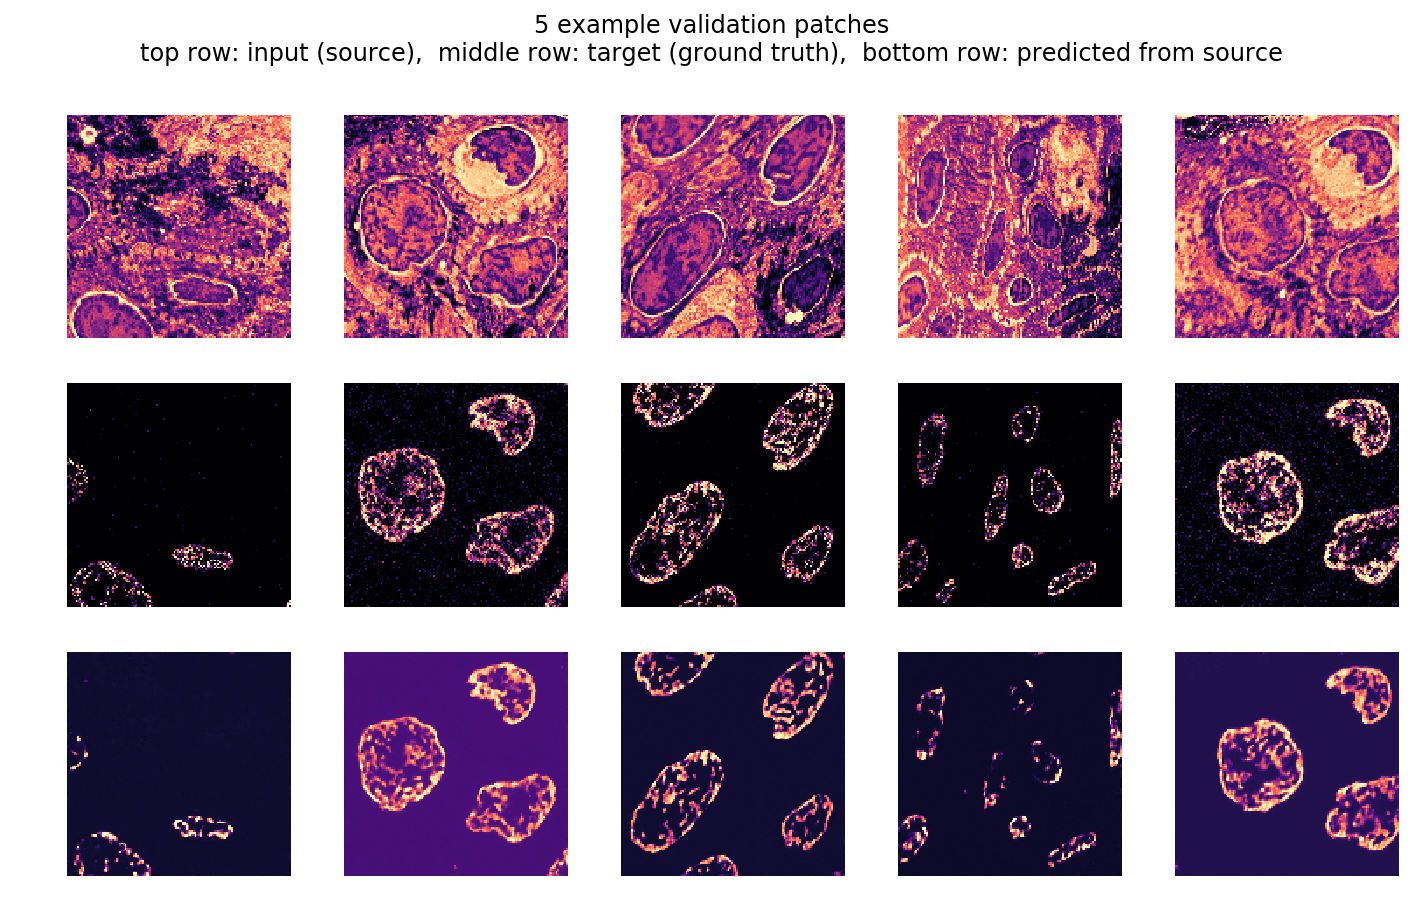

In [10]:
plt.figure(figsize=(12,7))
_P = model.keras_model.predict(X_val[:5])
if config.probabilistic:
    _P = _P[...,:(_P.shape[-1]//2)]
plot_some(X_val[:5],Y_val[:5],_P,pmax=99.5)
plt.suptitle('5 example validation patches\n'      
             'top row: input (source),  '          
             'middle row: target (ground truth),  '
             'bottom row: predicted from source');



In [11]:


model.export_TF()



INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpoditz0j7/model/saved_model.pb

Model exported in TensorFlow's SavedModel format:
/home/s353960/programs/CSBDeep/Model_Bilder_Christoph_alle/my_model/TF_SavedModel.zip
